In [1]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ, assemble, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [2]:
def superposition_gate():
    # Create random 1-qubit state
    psi = random_statevector(2)
    init_gate = Initialize(psi)
    init_gate.label = "init"
    # Display it nicely
    display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
    # Show it on a Bloch sphere
    #plot_bloch_multivector(psi)
    
    return init_gate

In [3]:
def plot_bloch_sphere(qc):
    aer_sim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    qobj = assemble(qc)
    res = aer_sim.run(qobj).result()
    statevec = res.get_statevector()
    from qiskit_textbook.tools import vector2latex
    vector2latex(statevec, pretext="|\\psi\\rangle =")
    # Display it nicely
    display(array_to_latex(statevec, prefix="|\\psi\\rangle ="))
    # Show it on a Bloch sphere
    
    return statevec
    

In [4]:
def bit_error(qc):
    qc.x(0)    
    return qc

In [5]:
def phase_error(qc):
    qc.z(0)    
    return qc

In [6]:
qreg = QuantumRegister(9, 'q')
creg = ClassicalRegister(1, 'c')

In [7]:
qc = QuantumCircuit(qreg, creg)

In [8]:
qc_error = QuantumCircuit(qreg, creg)

In [9]:
qc_correction = QuantumCircuit(qreg, creg)

In [10]:
# initialize psi
init_gate = superposition_gate()

C:\Users\sudee\AppData\Local\Temp\ipykernel_21668\499170368.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  psi = random_statevector(2)


<IPython.core.display.Latex object>

In [11]:
# qc is the original circuit
qc.append(init_gate, [0])

In [12]:
# qc_error is the circuit once error occurs
qc_error.append(init_gate, [0])

In [13]:
# qc_correction is the circuit after error correction has been applied
qc_correction.append(init_gate, [0])

# Plot Bloch sphere for original circuit

In [14]:
st1 = plot_bloch_sphere(qc)

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

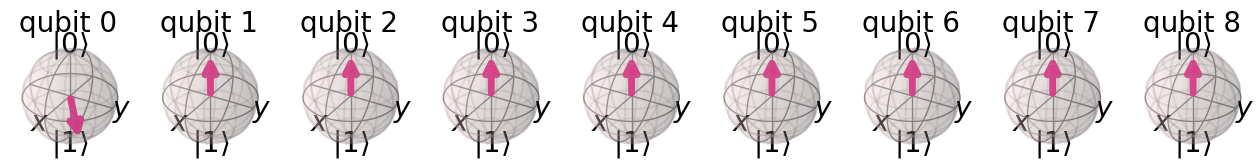

In [15]:
plot_bloch_multivector(st1)

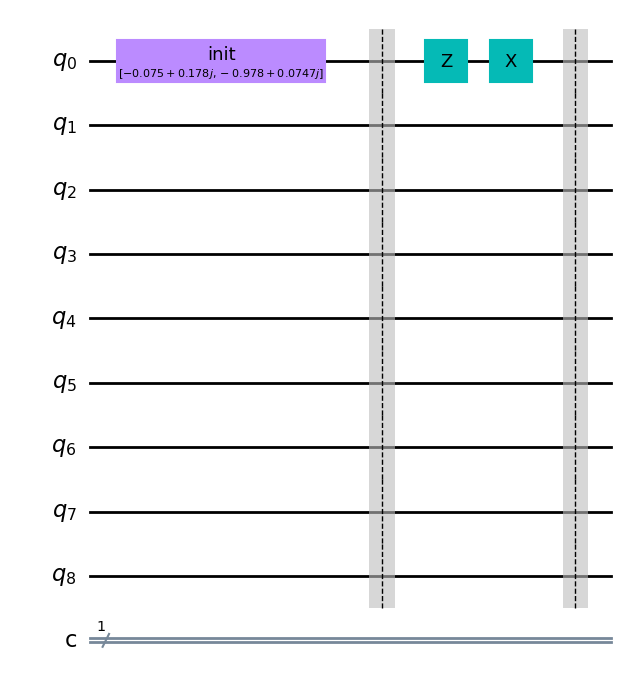

In [16]:
# Apply bit-flip and phase error to qc_error circuit
qc_error.barrier()
qc_error = phase_error(qc_error)
qc_error = bit_error(qc_error)

qc_error.barrier()
qc_error.draw(output='mpl')

# Plot Bloch sphere for circuit after introducing error

In [17]:
st2 = plot_bloch_sphere(qc_error)

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

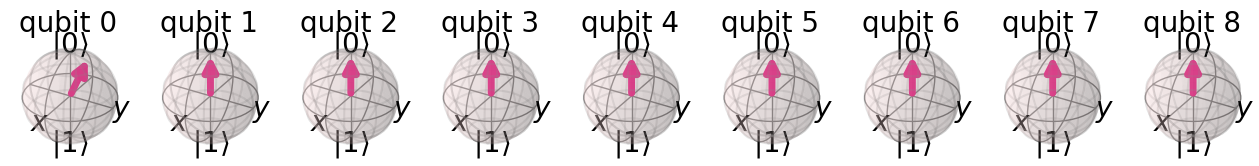

In [18]:
plot_bloch_multivector(st2)

In [19]:
# Apply error correction

In [20]:
# Circuit design before error is introduced

qc_correction.barrier()
qc_correction.cx([0],[3])
qc_correction.cx([0],[6])

qc_correction.h([0])
qc_correction.h([3])
qc_correction.h([6])

qc_correction.cx([0],[1])
qc_correction.cx([3],[4])
qc_correction.cx([6],[7])

qc_correction.cx([0],[2])
qc_correction.cx([3],[5])
qc_correction.cx([6],[8])

#qc_correction.barrier(q)

In [21]:
# Introduce both bit-flip and phase error
qc_correction.barrier()
#qc_correction = bit_error(qc_correction)
qc_correction = phase_error(qc_correction)
qc_correction = bit_error(qc_correction)

qc_correction.barrier()

In [22]:
# Circuit design after error is introduced

qc_correction.cx([0],[1])
qc_correction.cx([3],[4])
qc_correction.cx([6],[7])

qc_correction.cx([0],[2])
qc_correction.cx([3],[5])
qc_correction.cx([6],[8])

qc_correction.ccx([1],[2],[0])
qc_correction.ccx([4],[5],[3])
qc_correction.ccx([8],[7],[6])

qc_correction.h([0])
qc_correction.h([3])
qc_correction.h([6])

qc_correction.cx([0],[3])
qc_correction.cx([0],[6])
qc_correction.ccx([6],[3],[0])

#qc_correction.barrier()

# Plot Bloch sphere after error correction

In [23]:
st3 = plot_bloch_sphere(qc_correction)

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

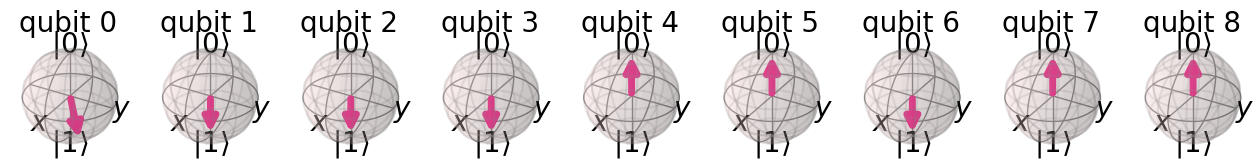

In [24]:
plot_bloch_multivector(st3)

# Measure QEC circuit

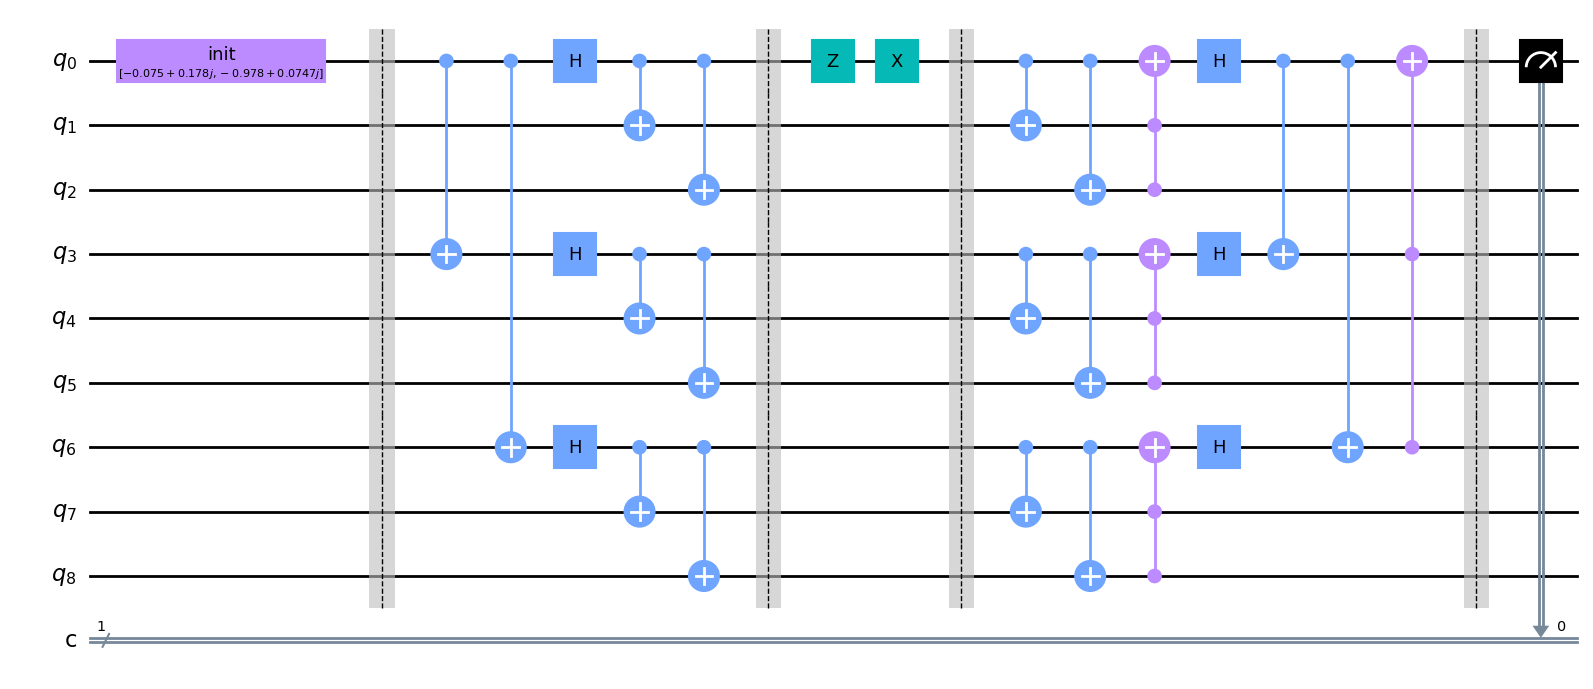

In [25]:
qc_correction.measure([0],[0])
qc_correction.draw(output='mpl')

In [26]:
# use local simulator
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_correction)
results = aer_sim.run(qobj, shots=1000).result()
answer = results.get_counts()

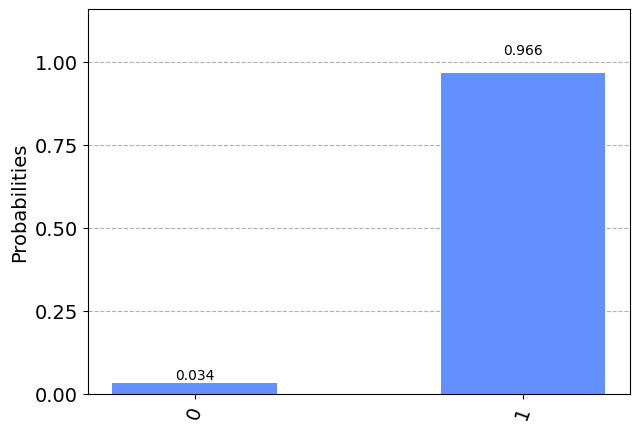

In [27]:
plot_histogram(answer)

# Measure original circuit

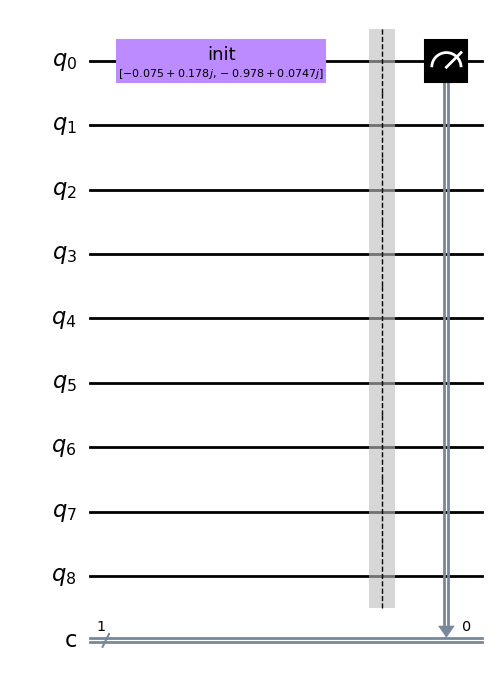

In [28]:
qc.measure([0],[0])
qc.draw(output='mpl')

In [29]:
# use local simulator
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
results = aer_sim.run(qobj, shots=1000).result()
answer = results.get_counts()

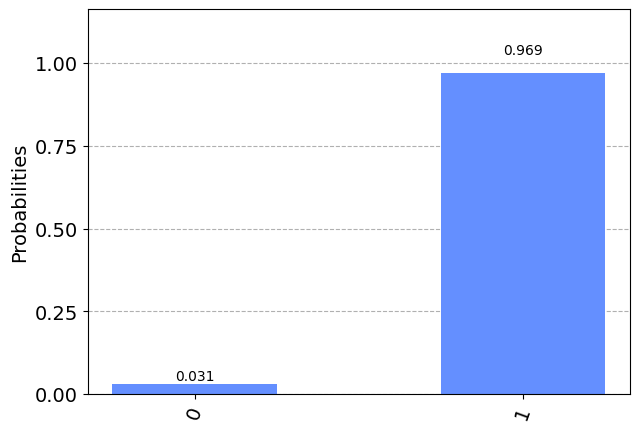

In [30]:
plot_histogram(answer)

# Measure error circuit

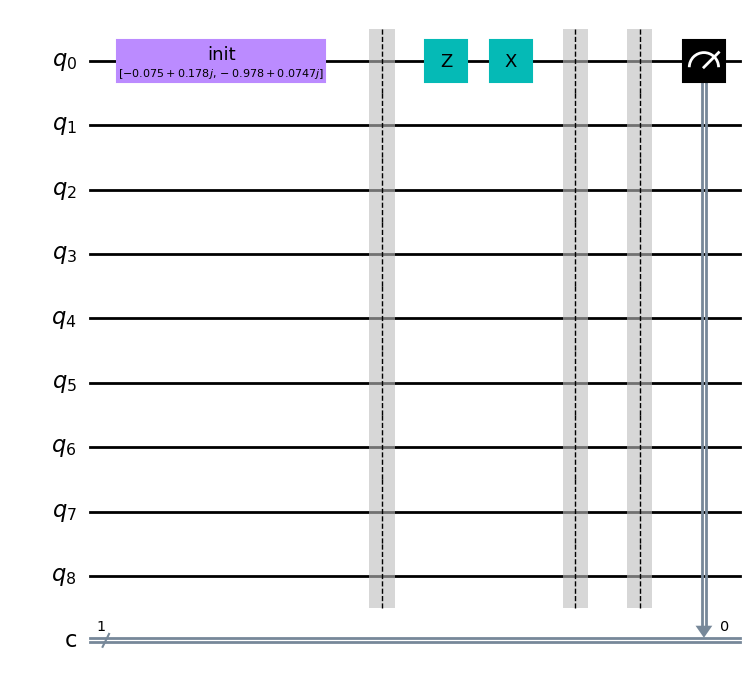

In [31]:
qc_error.measure([0],[0])
qc_error.draw(output='mpl')

In [32]:
aer_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_error)
results = aer_sim.run(qobj, shots=1000).result()
answer = results.get_counts()

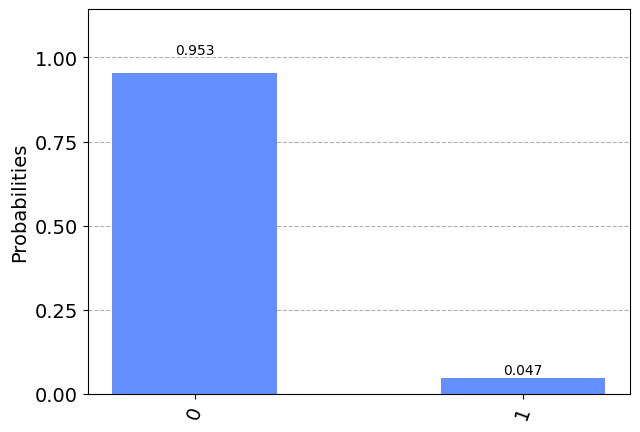

In [33]:
plot_histogram(answer)